In [26]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [27]:
# set paramters
batch_size = 128
num_classes = 10
epochs = 10
img_rows, img_cols = 28, 28

In [28]:
# load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 22s 2us/step


In [29]:
# data preprocessing
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

scale = np.max(x_train) # 255
x_train /= scale
x_test /= scale

mean = np.std(x_train)
x_train -= mean
x_test -= mean

In [30]:
print('x_train shape:', x_train.shape)  # (60000, 28, 28, 1)
print(x_train.shape[0], 'train samples')  # 60000
print(x_test.shape[0], 'test samples')  # 10000

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [32]:
# construct CNN
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


In [33]:
# train CNN
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 207s 3ms/step - loss: 0.2651 - acc: 0.9184 - val_loss: 0.0554 - val_acc: 0.9814
Epoch 2/10
60000/60000 [==============================] - 235s 4ms/step - loss: 0.0854 - acc: 0.9748 - val_loss: 0.0420 - val_acc: 0.9868
Epoch 3/10
60000/60000 [==============================] - 245s 4ms/step - loss: 0.0656 - acc: 0.9802 - val_loss: 0.0353 - val_acc: 0.9884
Epoch 4/10
60000/60000 [==============================] - 245s 4ms/step - loss: 0.0539 - acc: 0.9840 - val_loss: 0.0376 - val_acc: 0.9878
Epoch 5/10
60000/60000 [==============================] - 249s 4ms/step - loss: 0.0476 - acc: 0.9855 - val_loss: 0.0289 - val_acc: 0.9901
Epoch 6/10
60000/60000 [==============================] - 330s 6ms/step - loss: 0.0407 - acc: 0.9874 - val_loss: 0.0300 - val_acc: 0.9907
Epoch 7/10
60000/60000 [==============================] - 217s 4ms/step - 

In [34]:
# evaluate on test set
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02367150460453413
Test accuracy: 0.9928


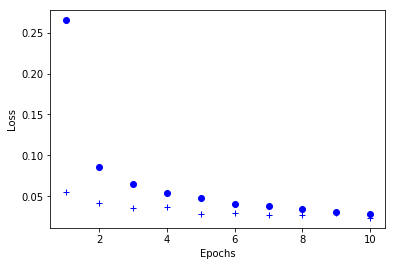

In [35]:
# visualize the loss function in each epoch
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


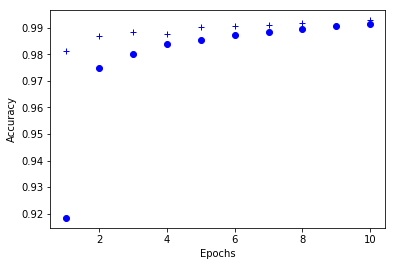

In [36]:
# visualize accuracy in each epoch
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()